In [4]:
import numpy as np
from scipy.special import gamma
import pylab
import matplotlib.pyplot as plt

# Student's T distribution

$ p(x|\mu,\lambda,\upsilon)=\frac{\Gamma (\upsilon/2+1/2)}{\Gamma(\upsilon/2)}
(\frac{\lambda}{\pi\upsilon})^{1/2}[1+\frac{\lambda(x-\mu)^2}{\upsilon}]^{\upsilon/2-1/2}$

In [38]:
def T_dist(x,lamb,mu,upsilon):
    term1 = gamma(upsilon/2+1/2)/gamma(upsilon/2)
    term2 = (lamb/np.pi/upsilon)**(1/2)
    term3 = (1+lamb*(x-mu)**2/upsilon)**(-upsilon/2-1/2)
    p = term1 * term2 * term3
    return p

We aim to check the variation of distributions depending on the value of $\upsilon$ and 'whether $p(x|\mu,\lambda,\epsilon)$ converge to $N(x|\mu,1/\lambda)$ as $\upsilon \rightarrow \infty$'.

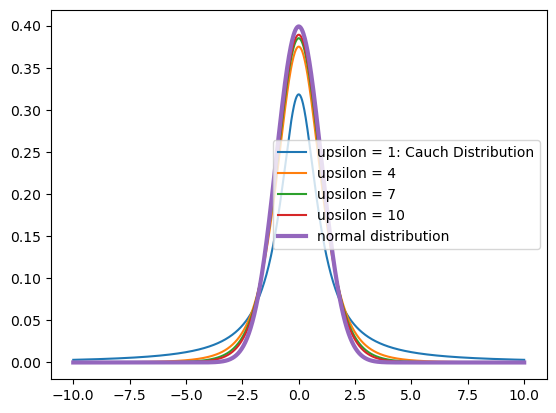

In [39]:
x = np.linspace(-10,10,1000)
mu, lamb = 0, 1

upsilon = 1
plt.plot(x,T_dist(x,lamb,mu,upsilon), label = 'upsilon = ' + str(1)+': Cauch Distribution')
for i in [4,7, 10]:
    upsilon = i
    plt.plot(x,T_dist(x,lamb,mu,upsilon), label = 'upsilon = ' + str(i))
plt.plot(x,1/(1/lamb * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * (1/lamb)**2)),
         label = 'normal distribution',linewidth = 3)
plt.legend()
plt.show()

# Laplace Distribution: Double-sided exponential Distribution

$Lap(x|\mu,b) = \frac{1}{2b}e^{-\frac{(x-\mu)}{b}}$ 

$\mu$: local parameter, $b$: scale parameter

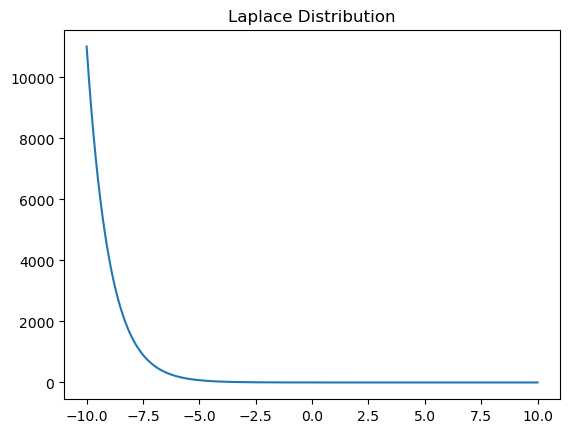

In [42]:
def lap_dist(x,mu,b):
    p = 1/2/b*np.exp(-(x-mu)/b)
    return p

mu, b = 0, 1
plt.plot(x,lap_dist(x,mu,b))
plt.title('Laplace Distribution')
plt.show()

# Beta Distribution

$Beta(x)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}x^{a-1}(1-x)^{b-1}, x\in [0,\infty]$

/var/folders/1x/3k6lld0102scs17z3spqws940000gn/T/ipykernel_3717/2191084596.py:2: RuntimeWarning: divide by zero encountered in power
  p = gamma(a+b)/gamma(a)/gamma(b)*x**(a-1)*(1-x)**(b-1)


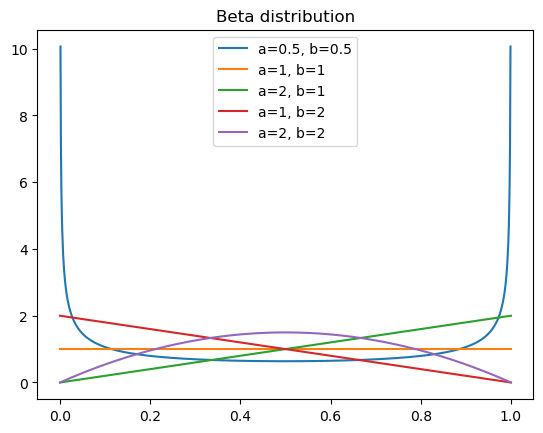

In [50]:
def beta(x,a,b):
    p = gamma(a+b)/gamma(a)/gamma(b)*x**(a-1)*(1-x)**(b-1)
    return p

x = np.linspace(0,1,1000)
a, b = 1, 1
for i in [(0.5,0.5),(1,1),(2,1),(1,2),(2,2)]:
    a,b = i
    plt.plot(x,beta(x,a,b),label = 'a='+str(a)+', b='+str(b))
    plt.title('Beta distribution')
plt.legend()
plt.show()

# Gamma Distribution

$Gamma(x|a,b)=\frac{b^a}{\Gamma(a)}x^{a-1}e^{-xb}$

In [53]:
def Gamma_dist(x,a,b):
    p = b**a/gamma(a)*x**(a-1)*np.exp(-x*b)
    return p

/var/folders/1x/3k6lld0102scs17z3spqws940000gn/T/ipykernel_3717/2420626932.py:2: RuntimeWarning: divide by zero encountered in power
  p = b**a/gamma(a)*x**(a-1)*np.exp(-x*b)


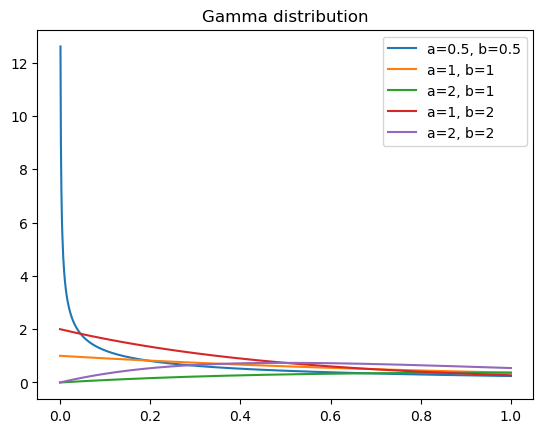

In [54]:
x = np.linspace(0,1,1000)
a, b = 1, 1
for i in [(0.5,0.5),(1,1),(2,1),(1,2),(2,2)]:
    a,b = i
    plt.plot(x,Gamma_dist(x,a,b),label = 'a='+str(a)+', b='+str(b))
    plt.title('Gamma distribution')
plt.legend()
plt.show()

# Exponential Distribution

$Exp(x|a,b)=Gamma(x|1,\lambda)=\lambda e^{-\lambda x}$

In [55]:
def exp_dist(x,lamb):
    p = Gamma_dist(x,1,lamb)
    return p

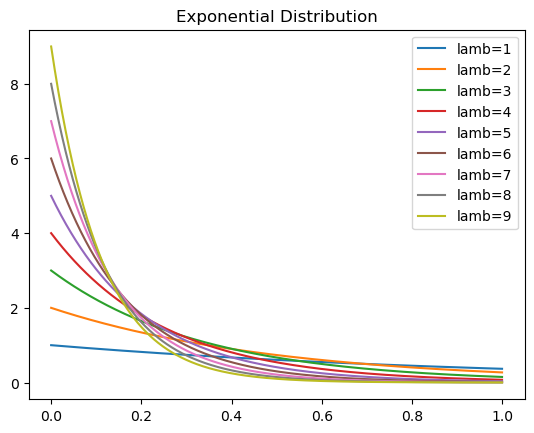

In [60]:
for i in range(1,10):
    lamb = i
    plt.plot(x,exp_dist(x,lamb),label = 'lamb='+str(i))
plt.title('Exponential Distribution')
plt.legend()
plt.show()

# Chi-Square Distribution

$\chi^2(x|\upsilon)=Gamma(x|\frac{\upsilon}{2},\frac{1}{2}) 
= \frac{(1/2)^{\upsilon/2}}{\Gamma(\upsilon/2)}x^{-\upsilon/2-1}e^{-x/2}, x\in[0,\infty)$

In [63]:
def chi_dist(x,upsilon):
    p = Gamma_dist(x, upsilon/2,1/2)
    return p

/var/folders/1x/3k6lld0102scs17z3spqws940000gn/T/ipykernel_3717/2420626932.py:2: RuntimeWarning: divide by zero encountered in power
  p = b**a/gamma(a)*x**(a-1)*np.exp(-x*b)


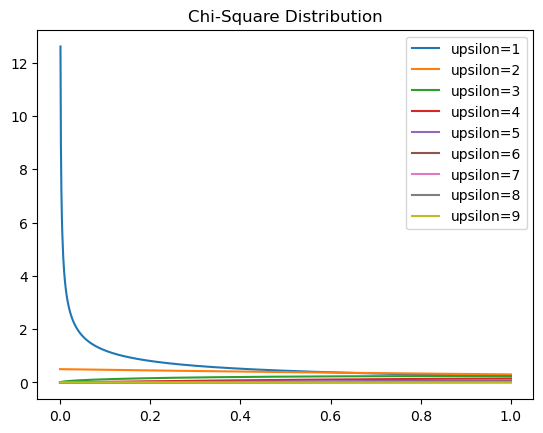

In [64]:
for i in range(1,10):
    upsilon = i
    plt.plot(x,chi_dist(x,upsilon),label = 'upsilon='+str(i))
plt.title('Chi-Square Distribution')
plt.legend()
plt.show()

# Pareto Distribution

$Pareto(x|k,m)=km^kx^{-(k+1)}\mathbb{I}_{(x\geq m)}$

In [17]:
def pareto_dist(x,m,k):
    dist = []
    for i in x:
        if i>=m:
            dist.append(k*m**k*i**(-k-1))
        else:
            dist.append(0)
    return dist

/var/folders/1x/3k6lld0102scs17z3spqws940000gn/T/ipykernel_1204/2824281420.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  dist.append(k*m**k*i**(-k-1))
/var/folders/1x/3k6lld0102scs17z3spqws940000gn/T/ipykernel_1204/2824281420.py:5: RuntimeWarning: invalid value encountered in double_scalars
  dist.append(k*m**k*i**(-k-1))


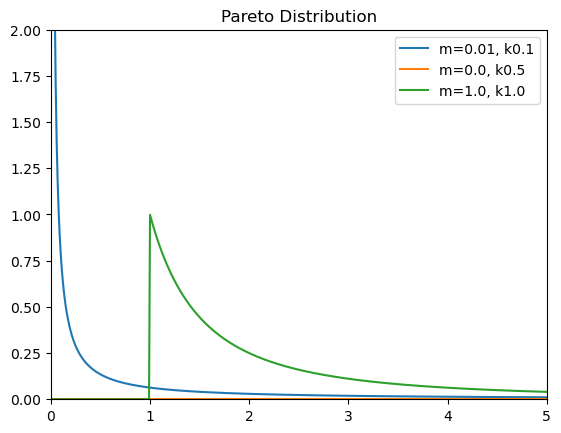

In [20]:
x = np.linspace(0,10,1000)
for i in [(0.01,0.10),(0.00,0.50),(1.00,1.00)]:
    m,k = i
    plt.plot(x,pareto_dist(x,m,k),label = 'm='+str(m)+', k'+str(k))
plt.xlim(0,5)
plt.ylim(0,2)
plt.title('Pareto Distribution')
plt.legend()
plt.show()